## Find the best SMA for the top 5 stocks
## Create a bias strategy
## Compare Drawndowns
## Pick the best 3 stocks on your portfolio.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


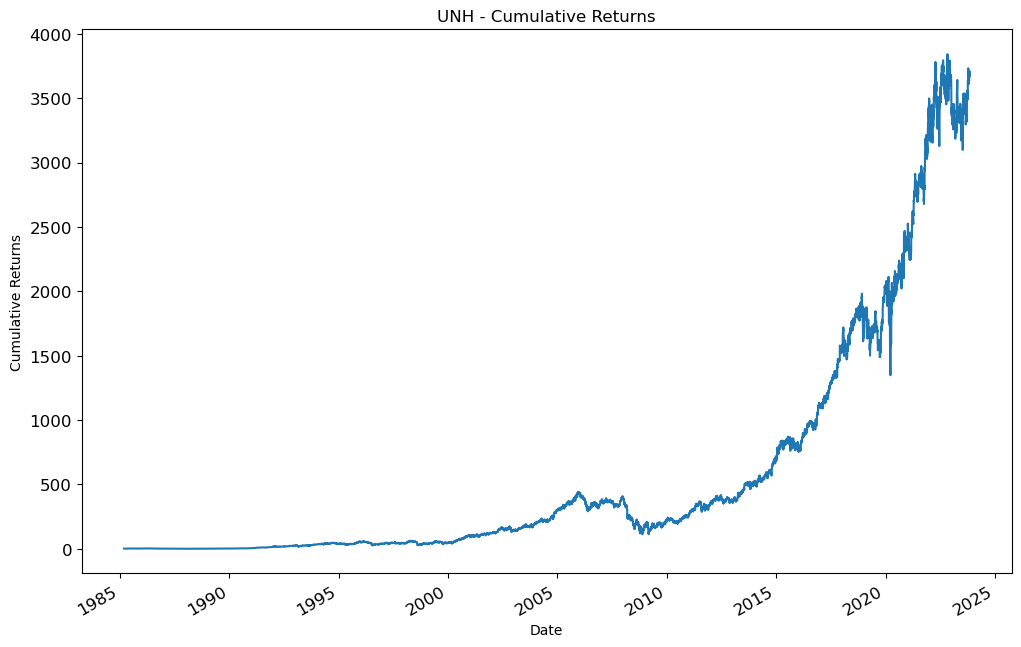

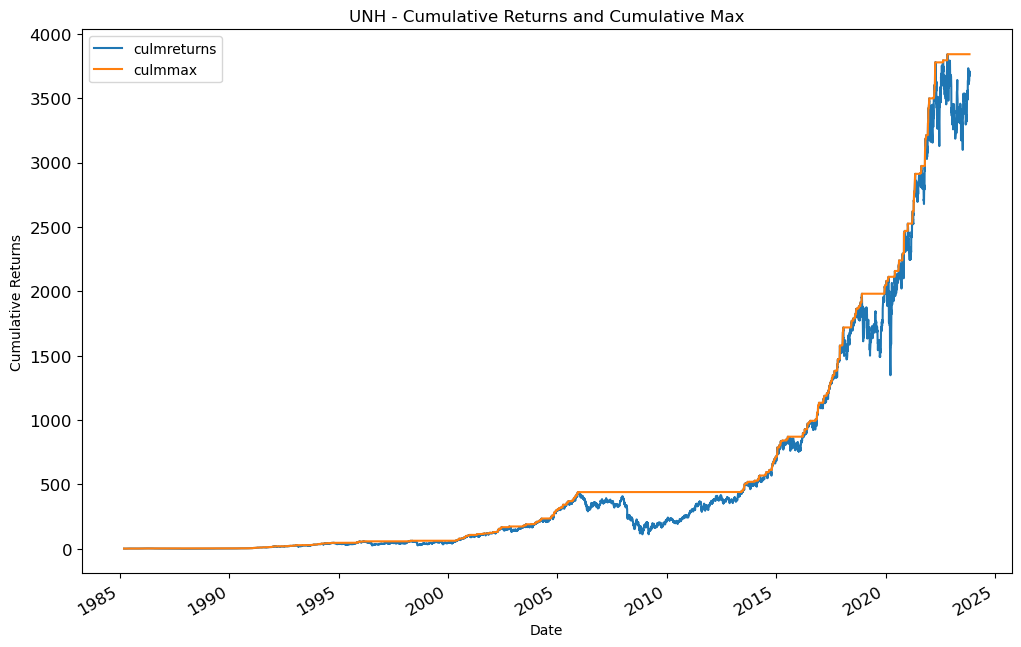

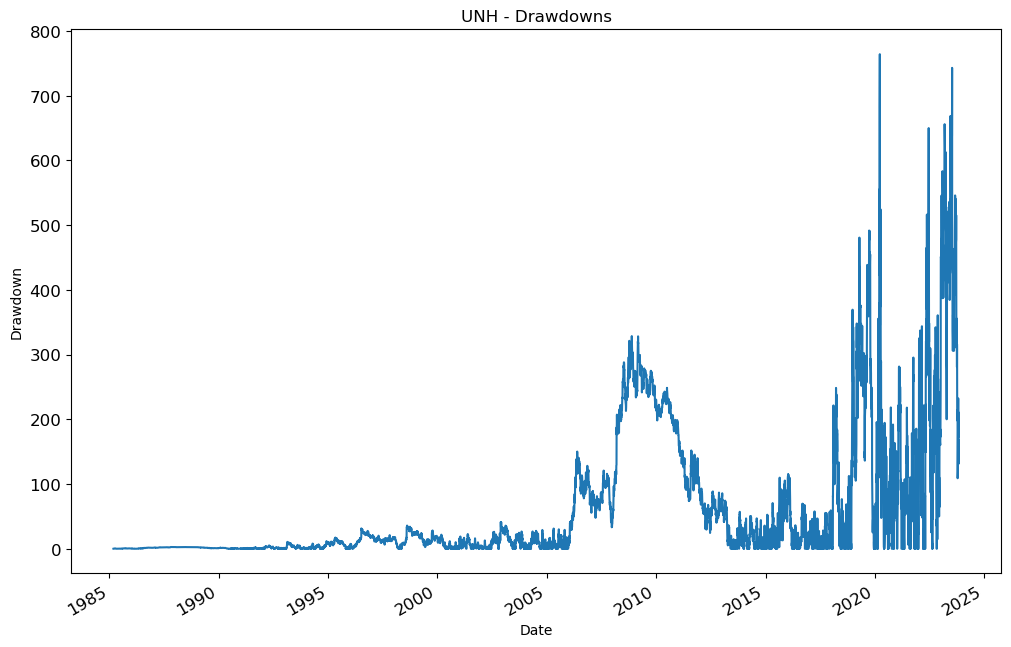

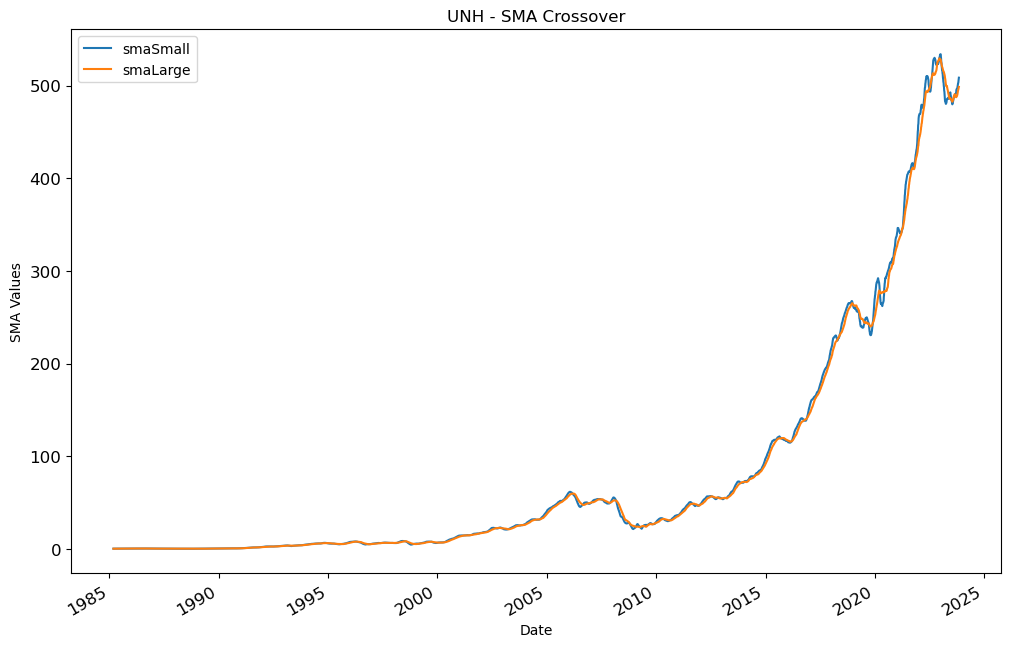

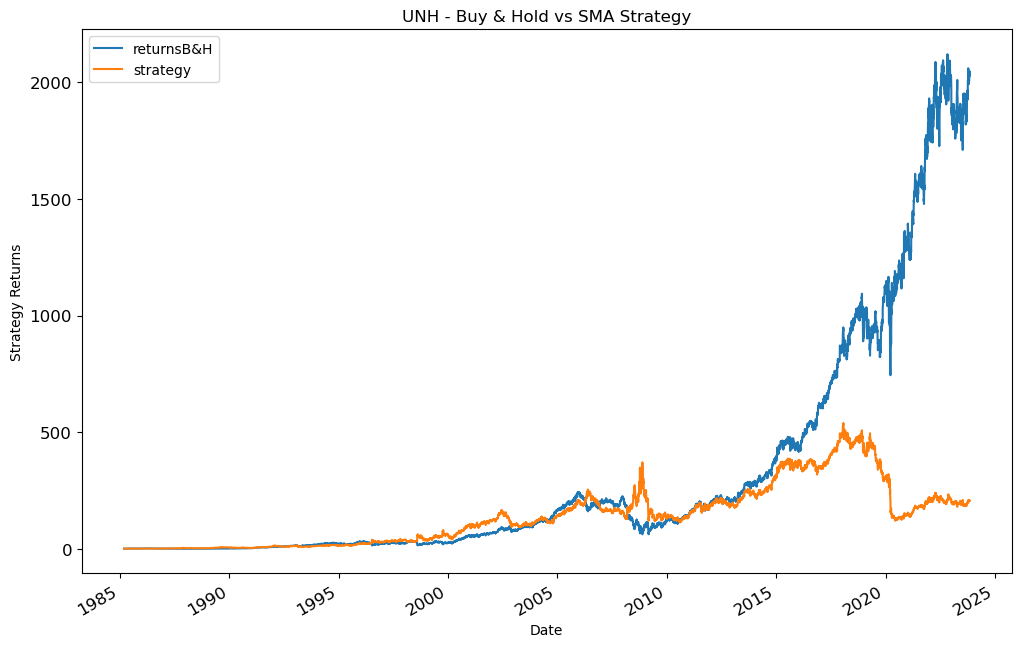

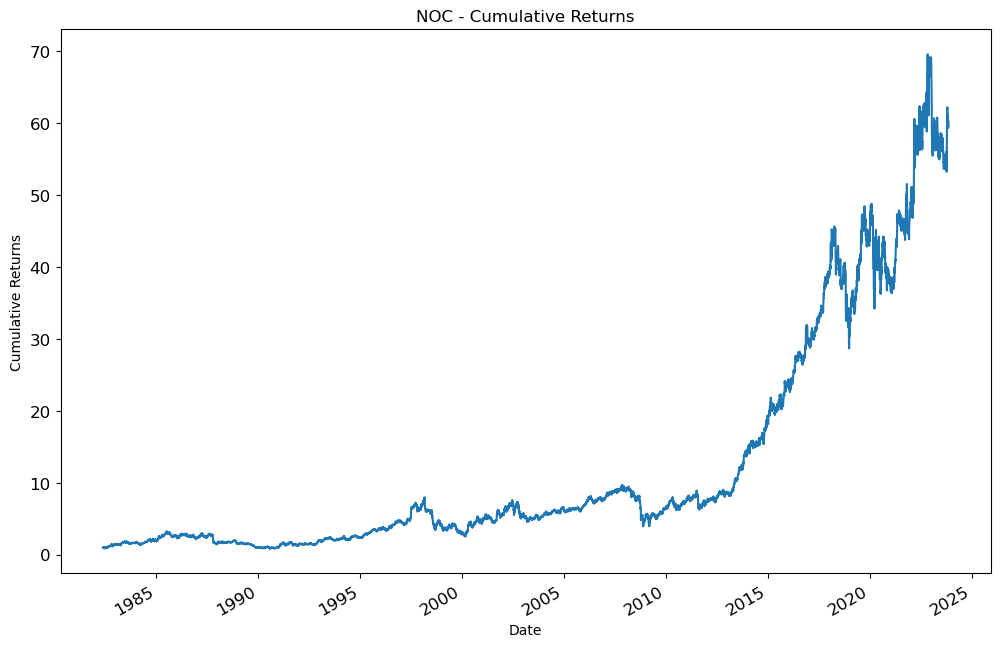

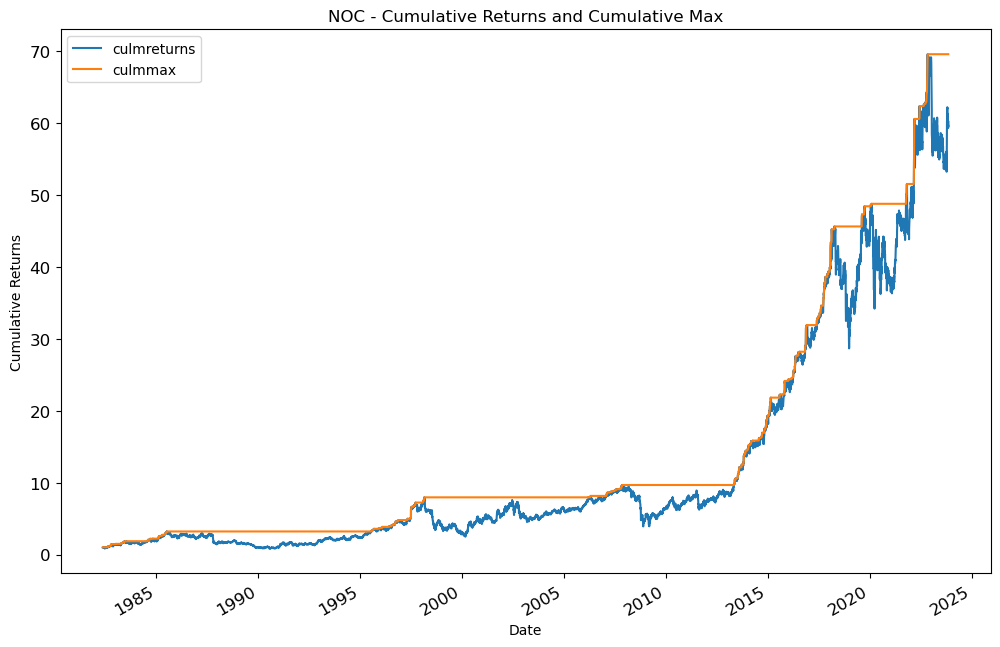

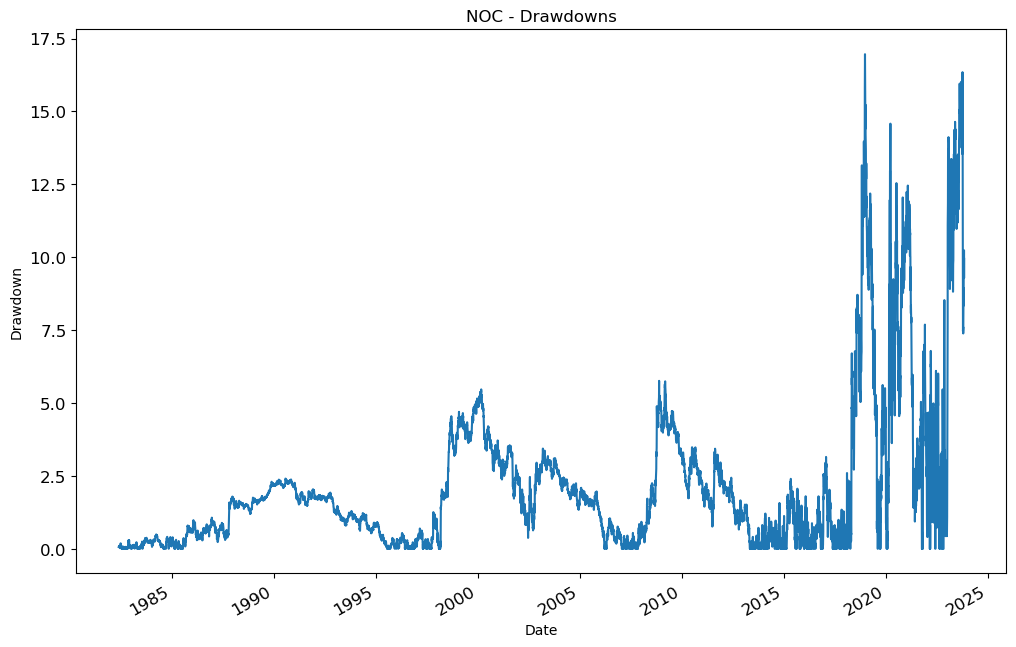

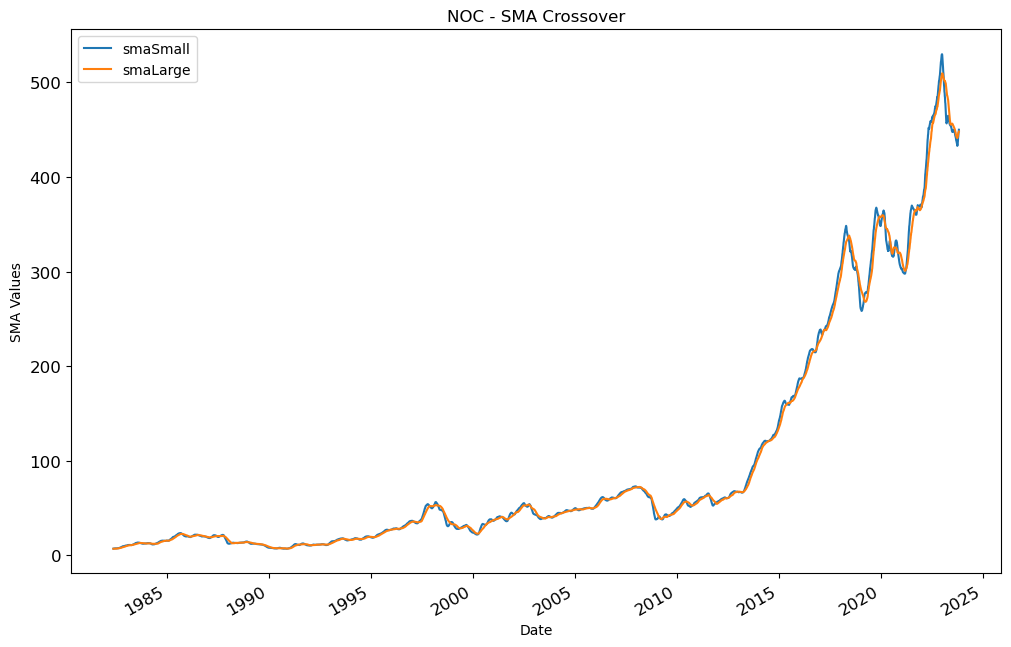

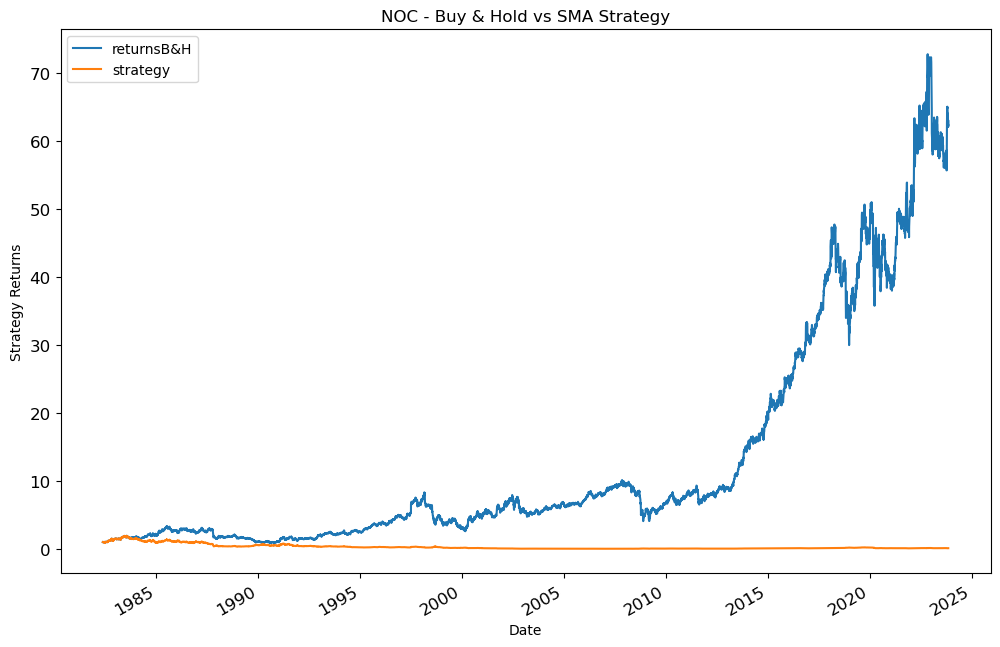

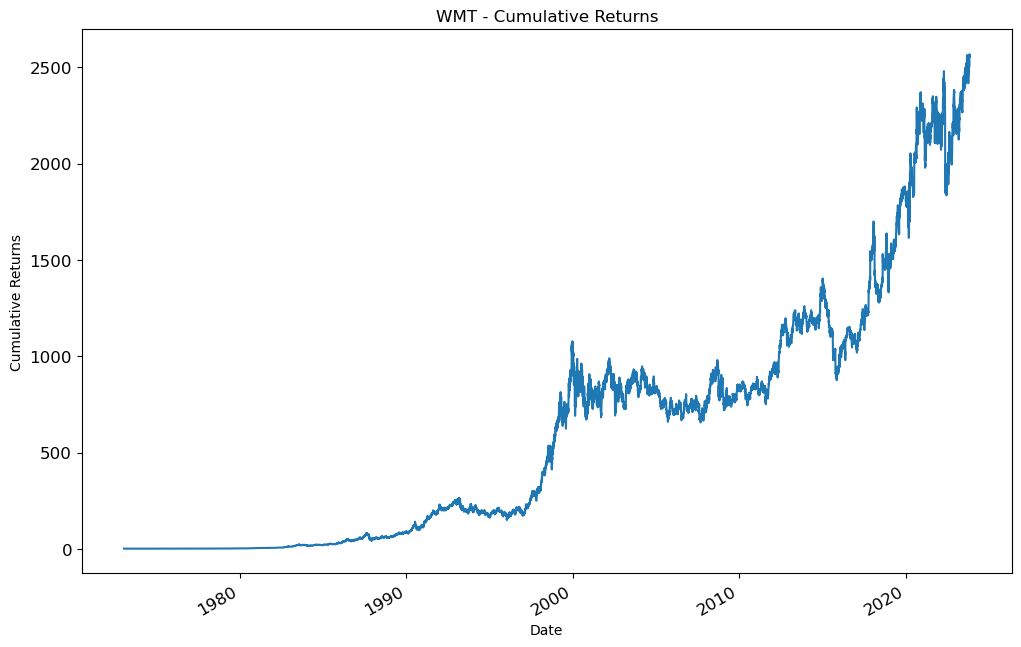

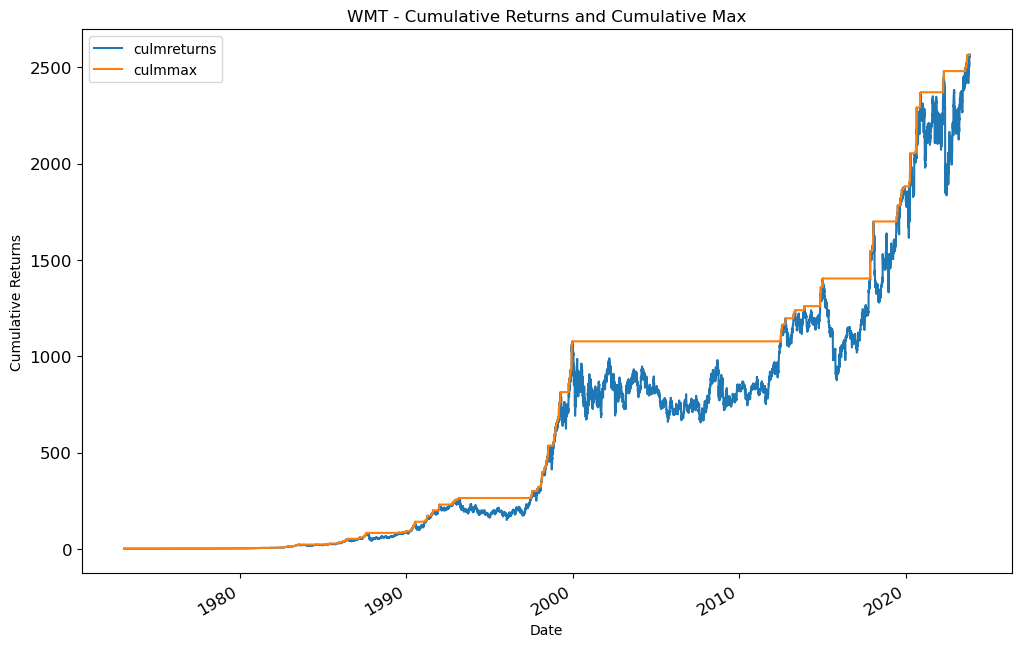

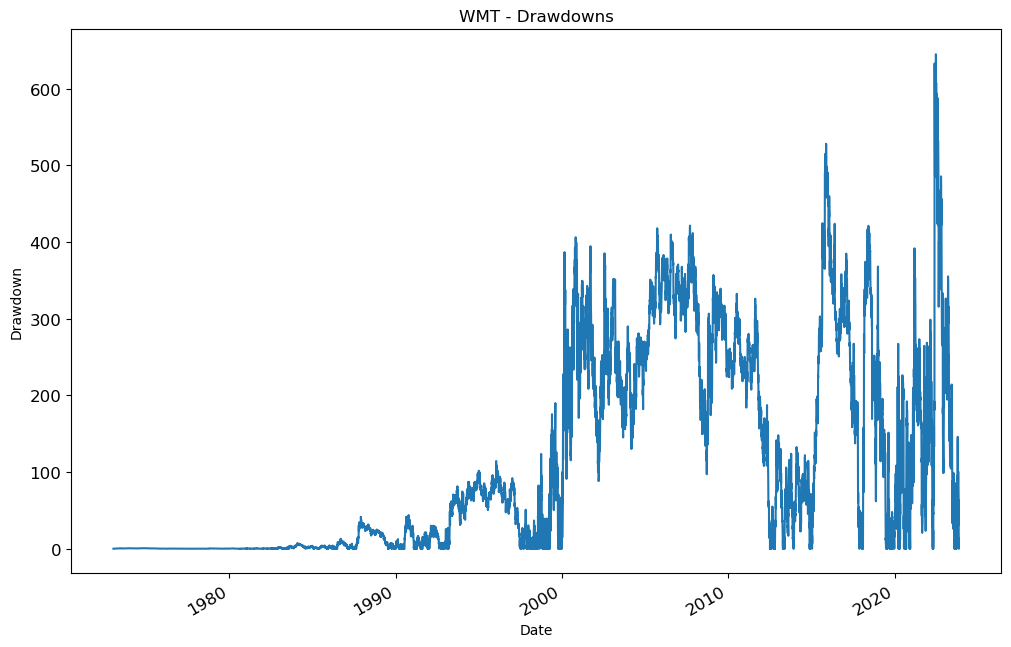

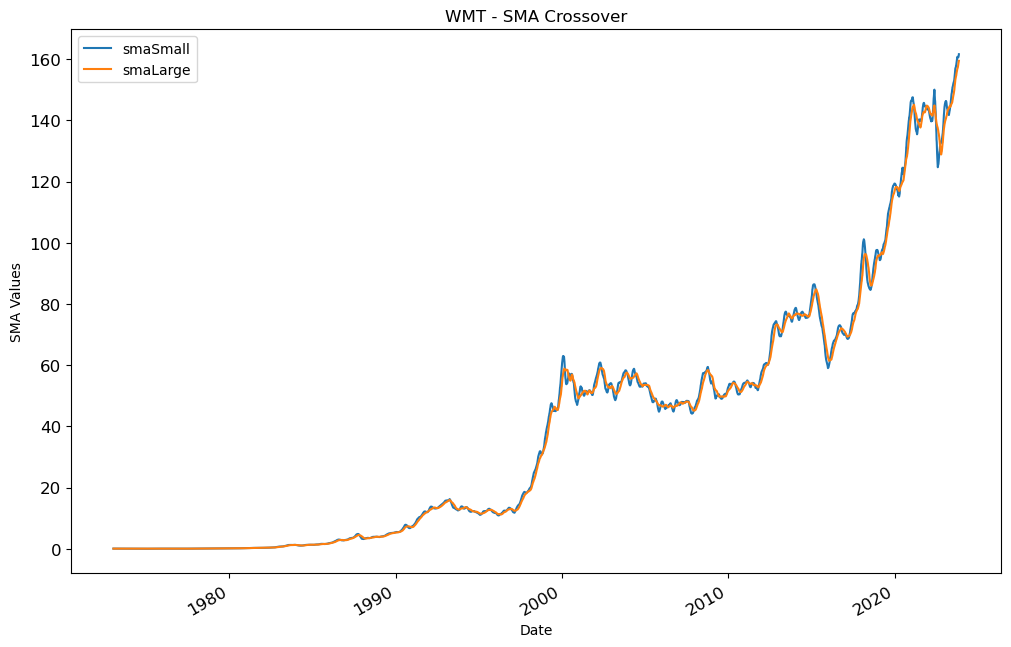

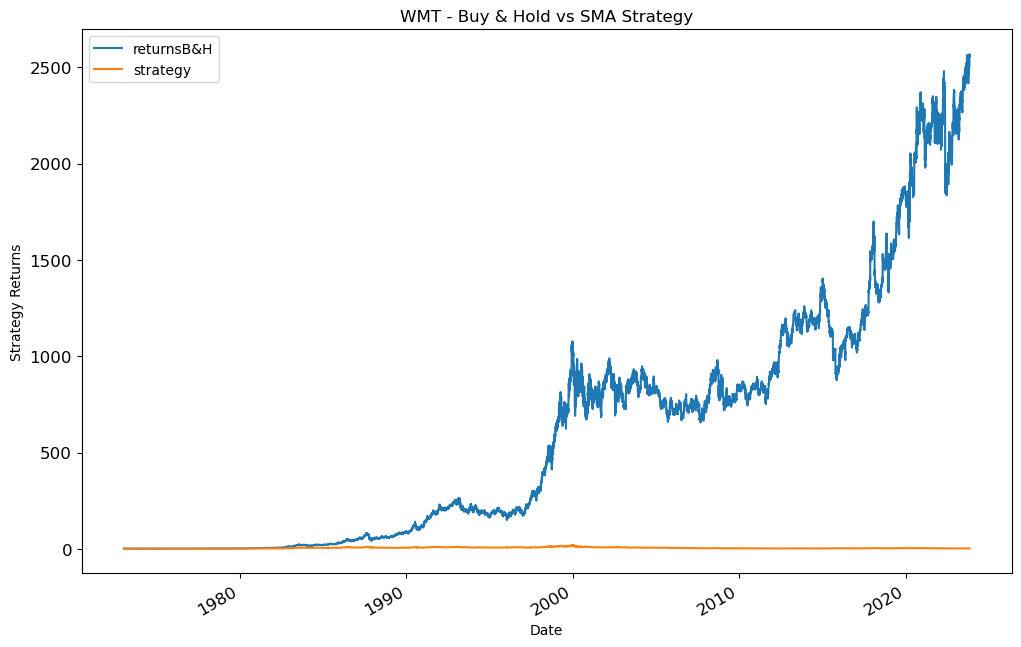

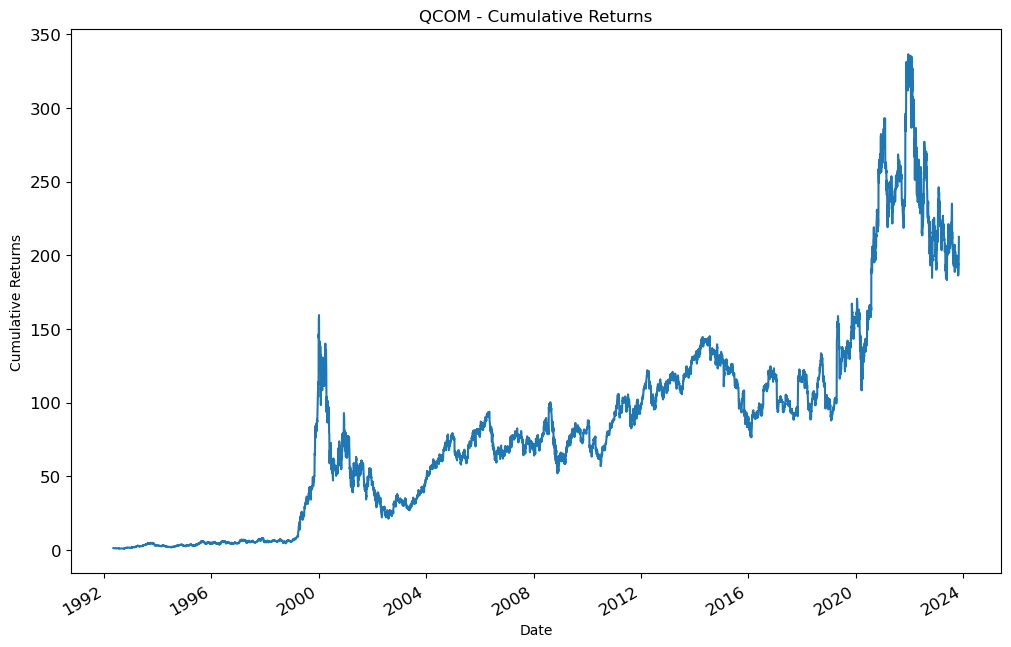

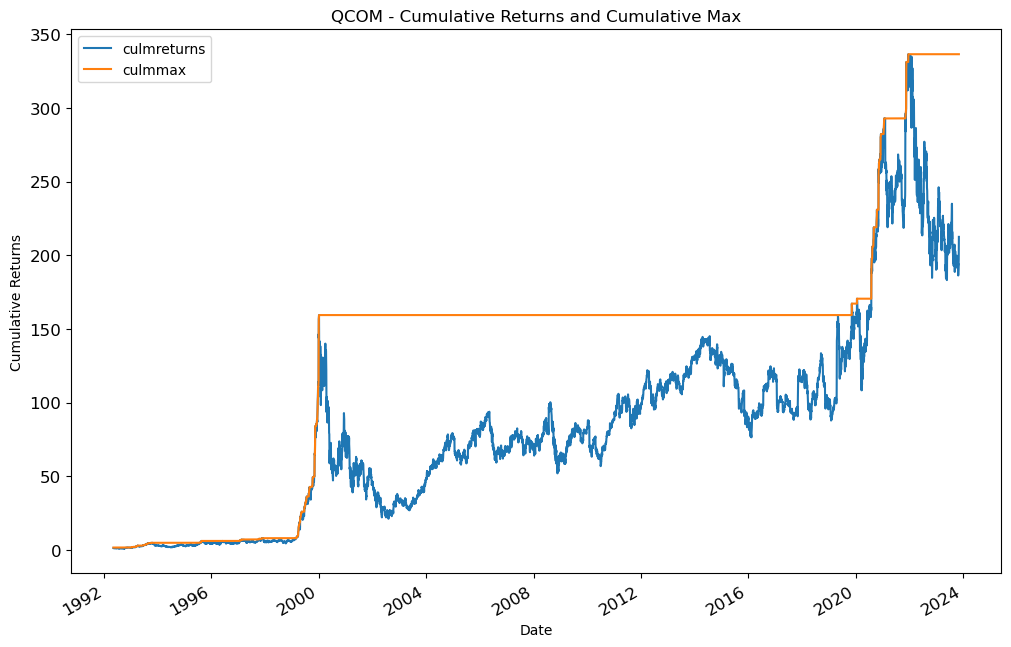

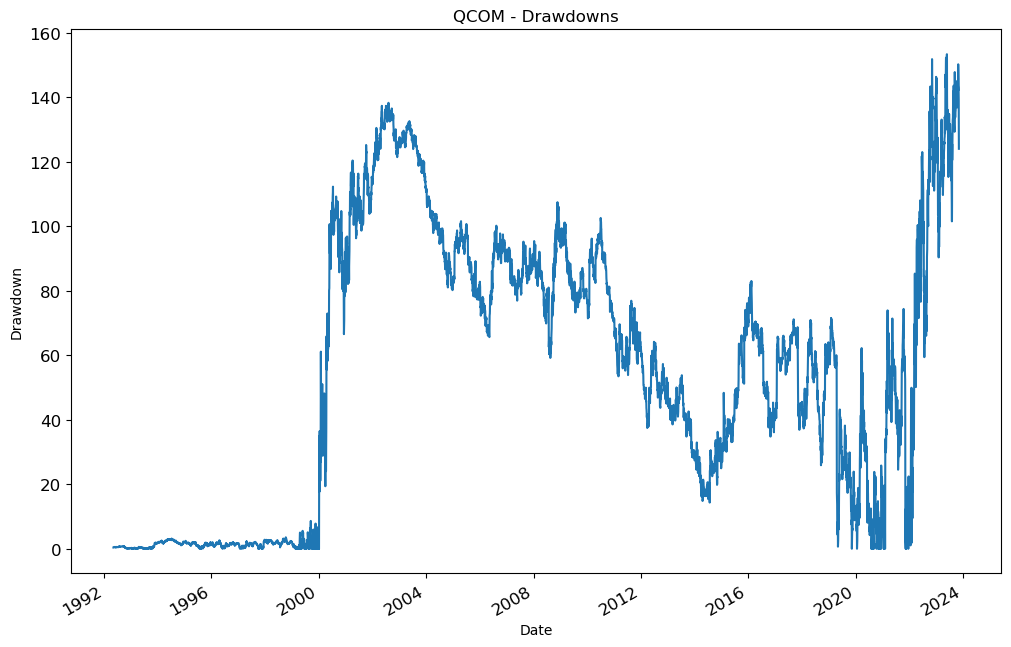

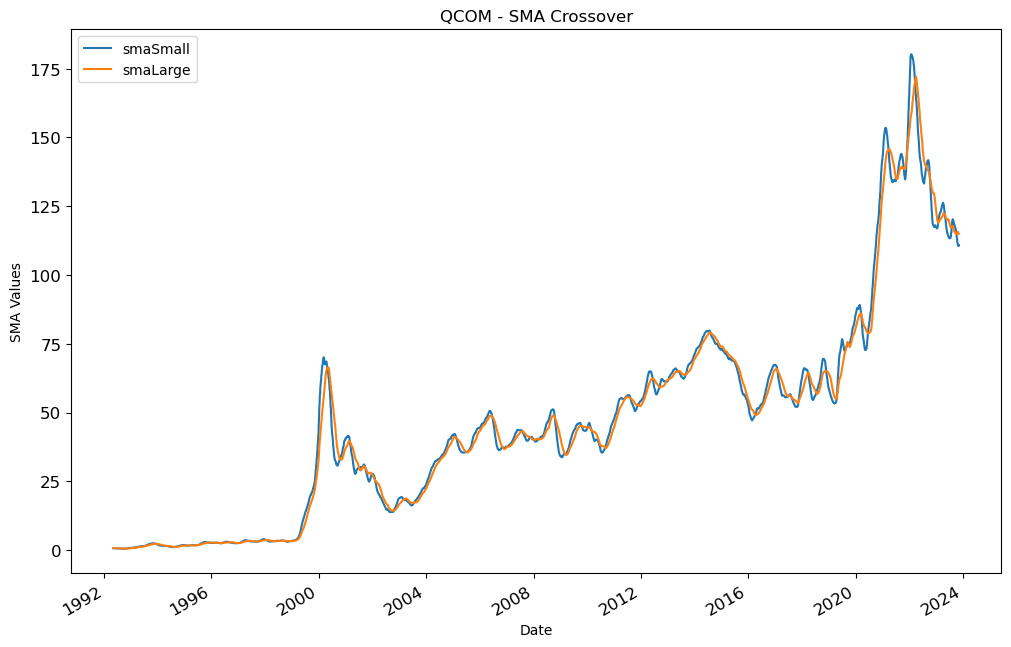

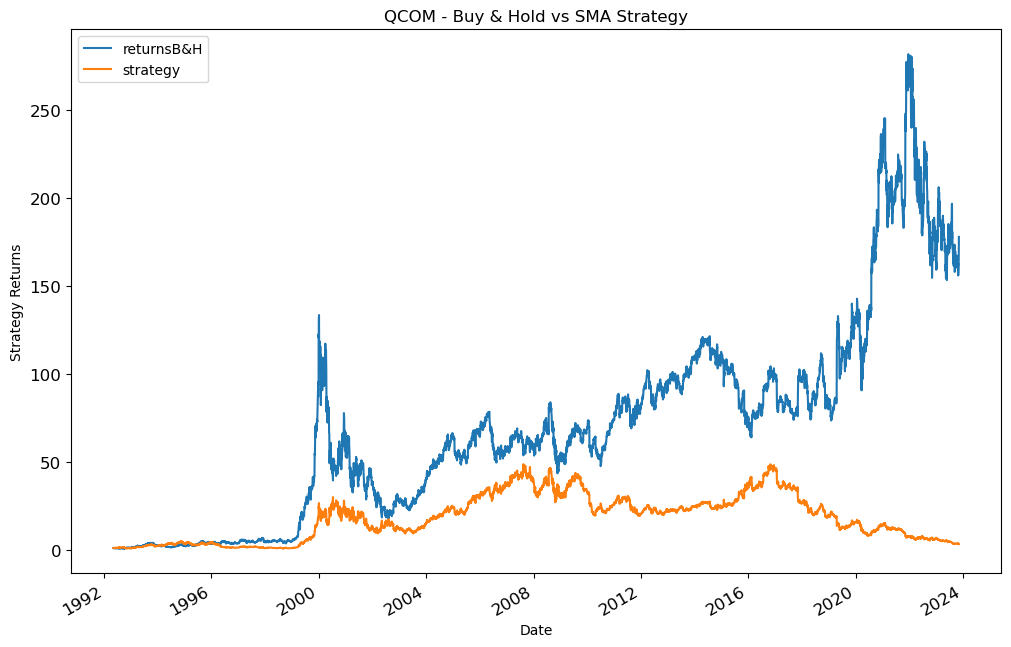

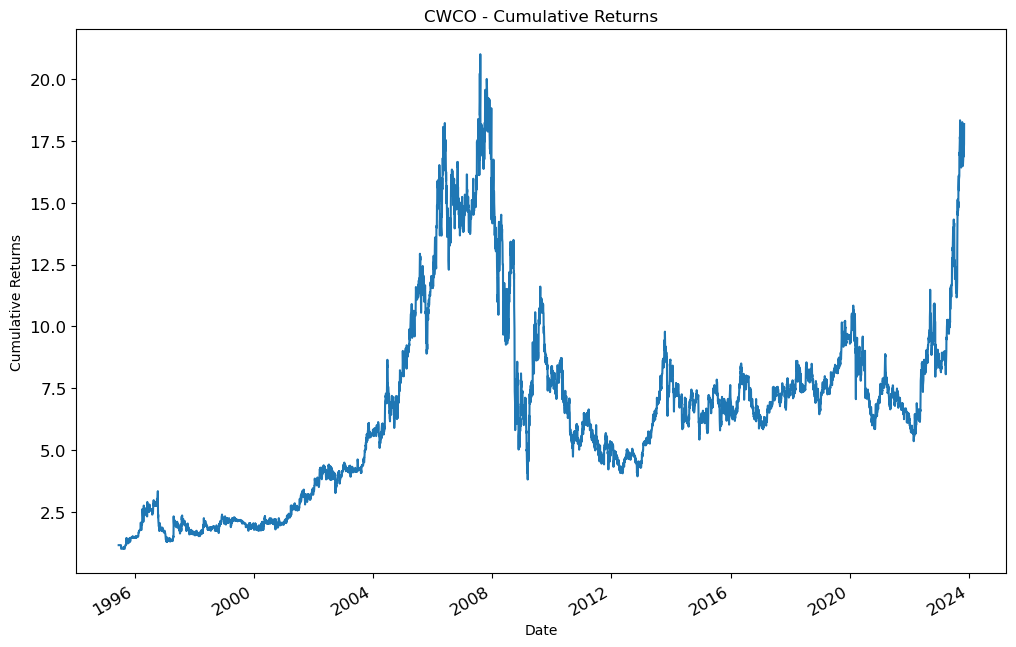

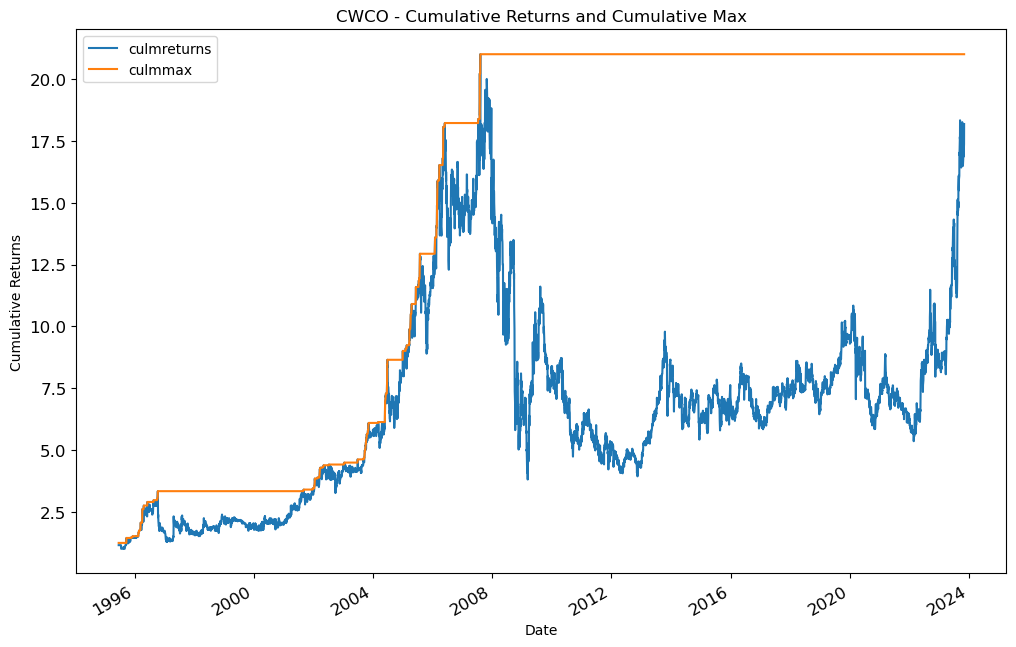

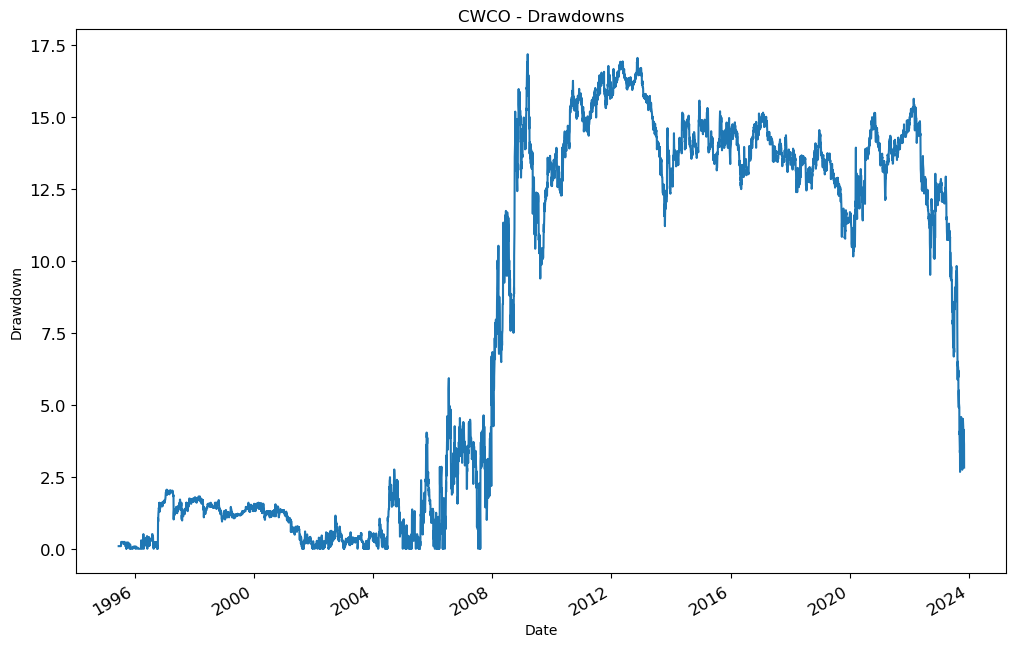

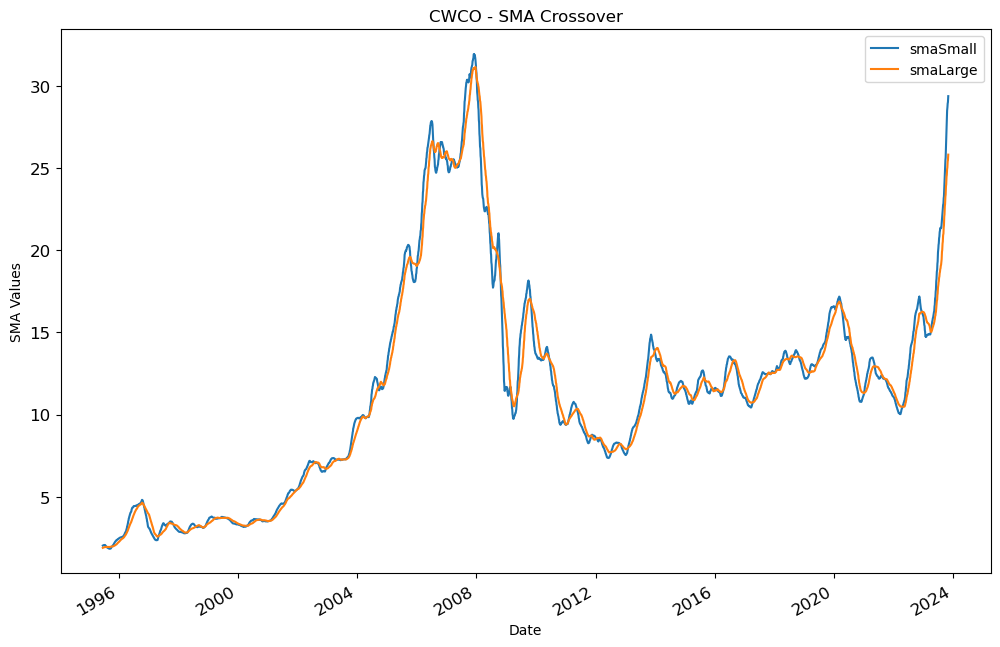

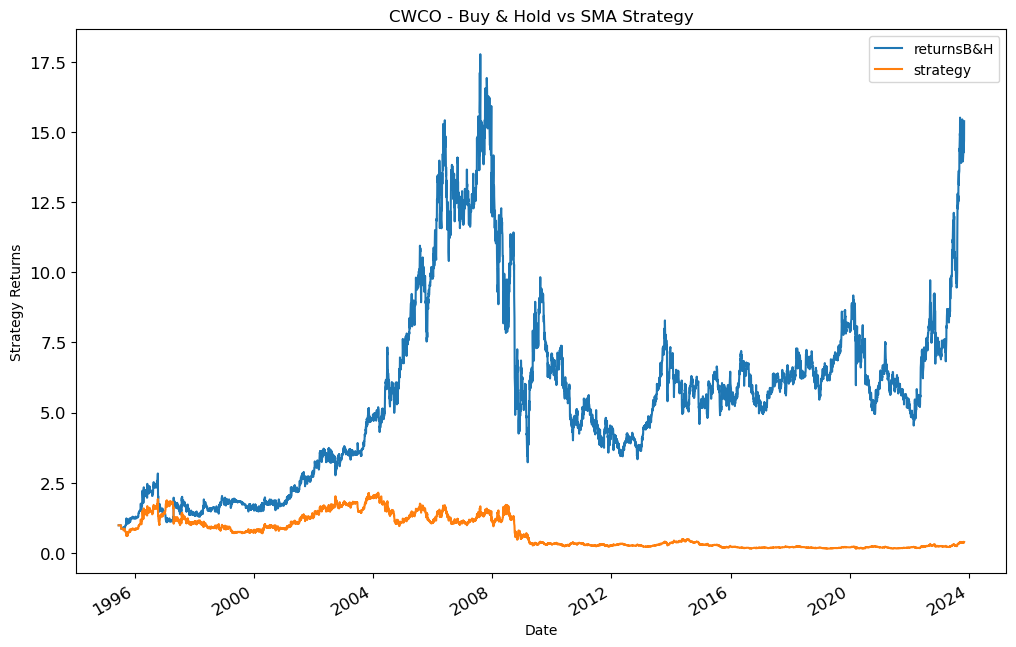

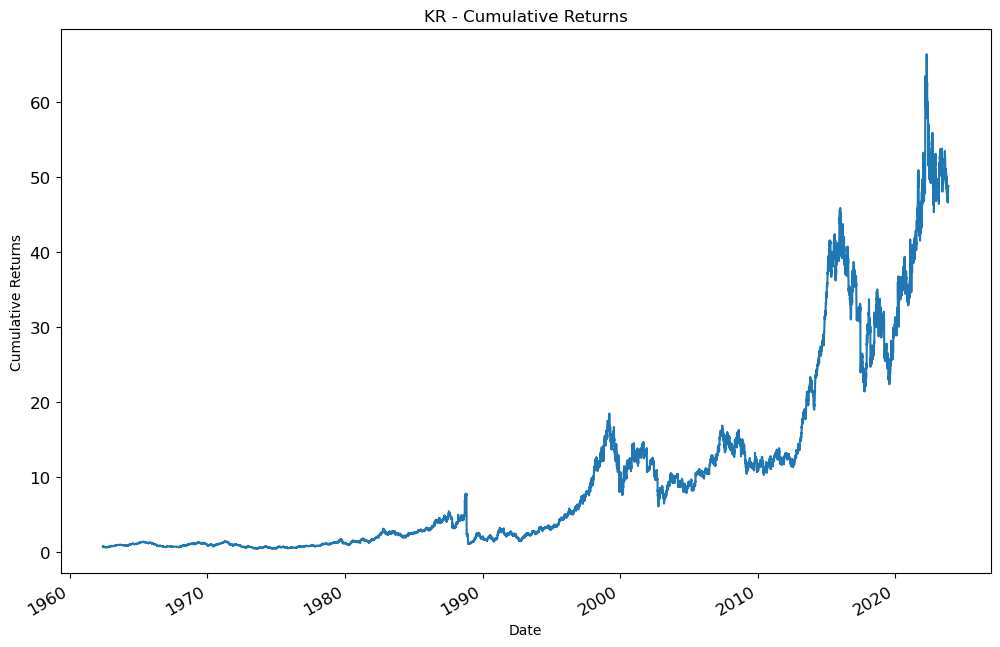

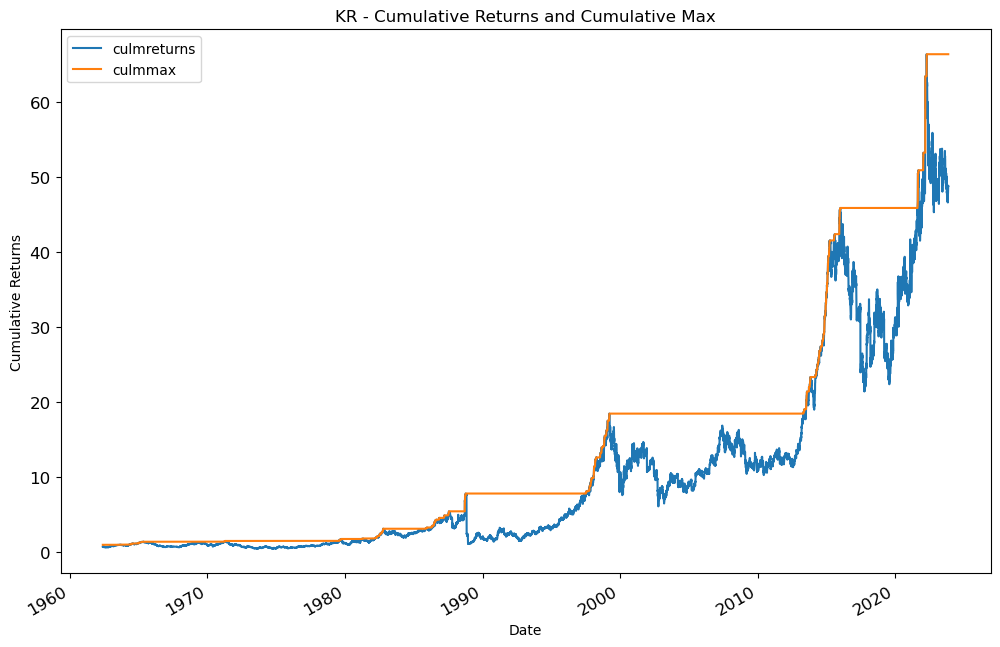

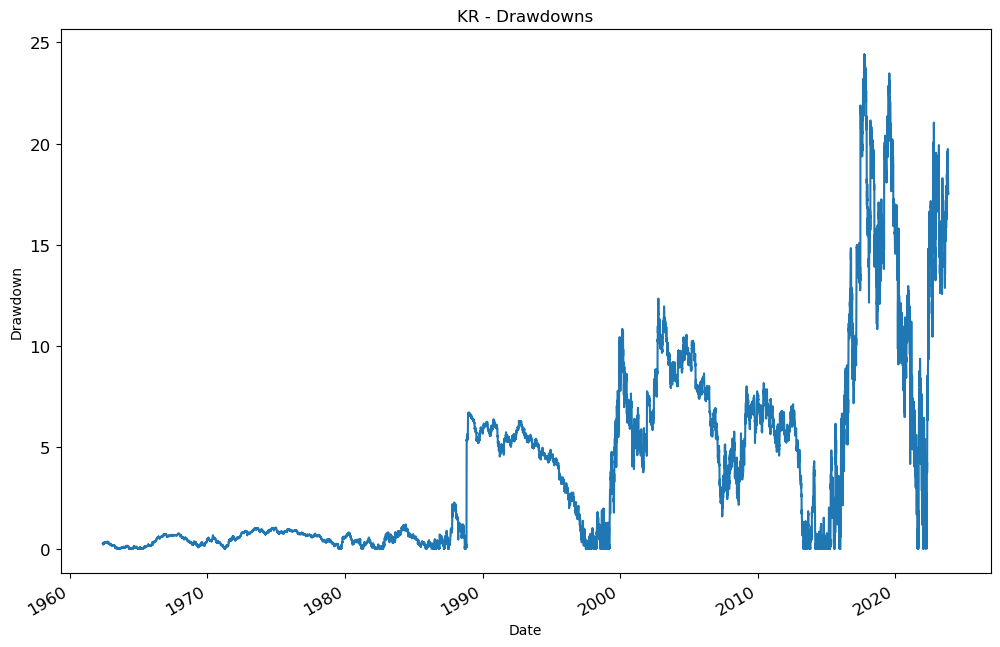

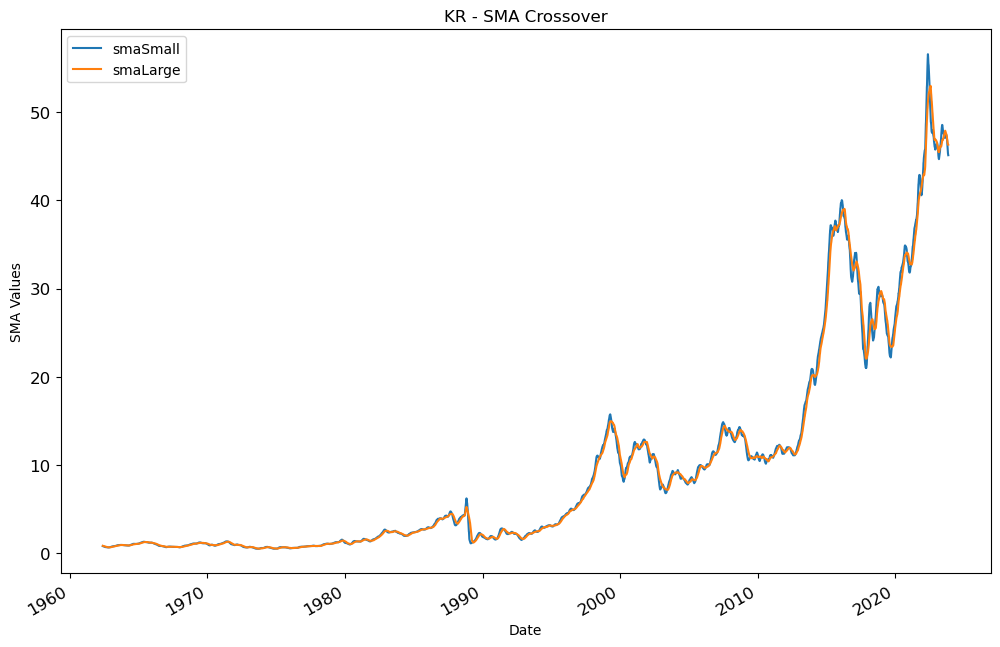

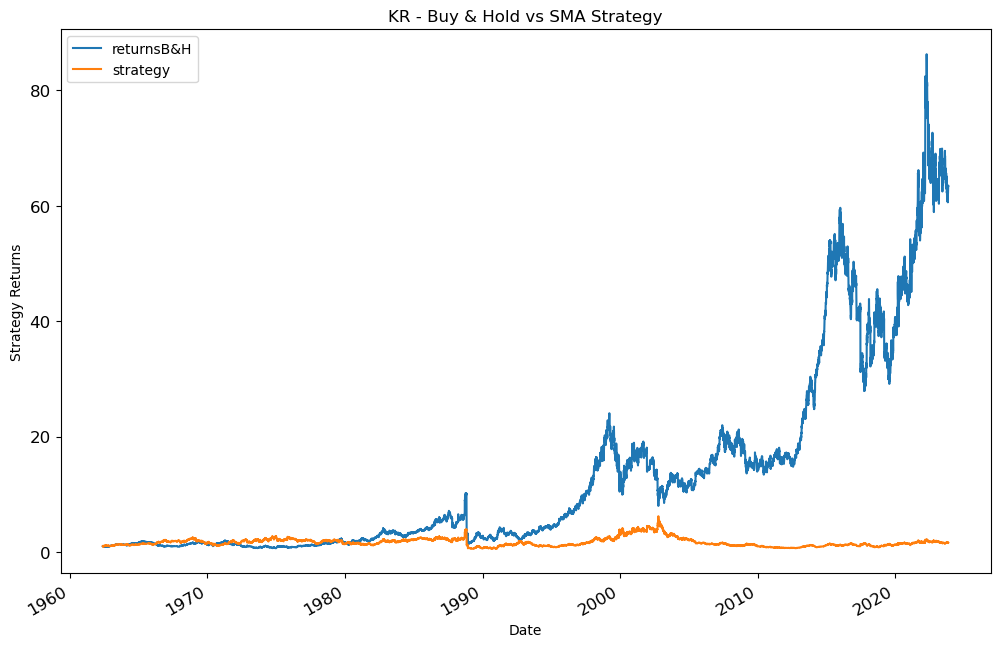

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the tickers
tickers = ['UNH', 'NOC', 'WMT', 'QCOM', 'CWCO', 'KR']

# Initialize a dictionary to store stock data
stock_data = {}

# Loop through each ticker
for ticker in tickers:
    # Download stock data
    stock = yf.download(ticker)
    stock = stock['Close'].to_frame()
    
    # Calculate daily logarithmic returns
    stock['d_returns'] = np.log(stock / stock.shift(1))
    
    # Calculate cumulative returns
    stock['culmreturns'] = stock['d_returns'].cumsum().apply(np.exp)
    
    # Calculate annualized mean and standard deviation of daily returns
    stock['annual_mean'] = stock['d_returns'].mean() * 252
    stock['annual_std'] = stock['d_returns'].std() * np.sqrt(252)
    
    # Calculate drawdowns
    stock['culmmax'] = stock['culmreturns'].cummax()
    stock['drawdown'] = stock['culmmax'] - stock['culmreturns']
    stock['drawdown_pct'] = stock['drawdown'] / stock['culmmax']
    
    # Implement SMA strategy
    smaSmall = 50
    smaLarge = 100
    stock['smaSmall'] = stock['Close'].rolling(smaSmall).mean()
    stock['smaLarge'] = stock['Close'].rolling(smaLarge).mean()
    stock.dropna(inplace=True)
    stock['position'] = np.where(stock['smaSmall'] > stock['smaLarge'], 1, -1)
    
    # Calculate strategy returns
    stock['returnsB&H'] = np.log(stock['Close'] / stock['Close'].shift(1))
    stock['strategy'] = stock['returnsB&H'] * stock['position'].shift(1)
    stock.dropna(inplace=True)
    
    # Store the stock data in the dictionary
    stock_data[ticker] = stock

# Plot settings
plt.rcParams["figure.figsize"] = (12, 8)

# Iterate over each stock and create plots
for ticker, stock in stock_data.items():
    # Plot cumulative returns
    stock['culmreturns'].plot(title=f'{ticker} - Cumulative Returns', fontsize=12)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.show()

    # Plot cumulative returns and cumulative max (to visualize drawdowns)
    stock[['culmreturns', 'culmmax']].plot(title=f'{ticker} - Cumulative Returns and Cumulative Max', fontsize=12)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.show()

    # Plot drawdowns
    stock['drawdown'].plot(title=f'{ticker} - Drawdowns', fontsize=12)
    plt.xlabel('Date')
    plt.ylabel('Drawdown')
    plt.show()

    # Plot the SMA crossover strategy positions
    stock[['smaSmall', 'smaLarge']].plot(title=f'{ticker} - SMA Crossover', fontsize=12)
    plt.xlabel('Date')
    plt.ylabel('SMA Values')
    plt.show()

    # Plot the buy and hold strategy vs SMA strategy
    stock[['returnsB&H', 'strategy']].cumsum().apply(np.exp).plot(title=f'{ticker} - Buy & Hold vs SMA Strategy', fontsize=12)
    plt.xlabel('Date')
    plt.ylabel('Strategy Returns')
    plt.show()
